In [2]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf
import pandas as pd

os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow import keras
from tensorflow.keras.preprocessing import image

from PIL import Image

In [3]:
model_number = "4"

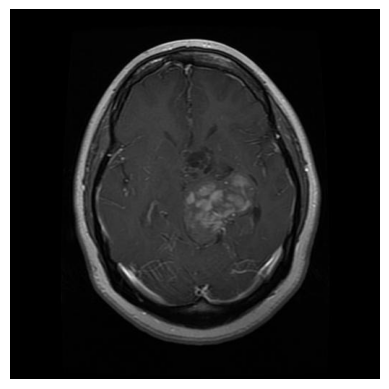

In [4]:
image_path = '../Training/glioma_tumor/gg (1).jpg'

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_width, image_height = 250, 250

# Create an ImageDataGenerator for training with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    shear_range=0.2,  # Shear angle in counter-clockwise direction
    zoom_range=0.2,   # Range for random zoom
    horizontal_flip=True,  # Randomly flip inputs horizontally
    validation_split=0.2)  # Here we specify the validation split

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '../Training/',
        target_size=(image_width, image_height),
        batch_size=32,
        # color_mode="grayscale",
        class_mode='categorical',
        subset='training',
        shuffle=True,
        seed=42)  # Set as training data

# Flow validation images in batches using train_datagen generator
validation_generator = train_datagen.flow_from_directory(
        '../Training/',  # point to the same directory as for the training data
        target_size=(image_width, image_height),
        batch_size=32,
        # color_mode="grayscale",
        class_mode='categorical',
        subset='validation',
        shuffle=True,
        seed=42
        ) # Set at validation data

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # Convolutional layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)),
    MaxPooling2D(2, 2),
    
    # Convolutional layer 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Convolutional layer 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Convolutional layer 4
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Flattening the 3D output to 1D
    Flatten(),
    
    # Dropout to reduce overfitting
    Dropout(0.25),
    
    # Dense layer for prediction
    Dense(512, activation='relu'),
    
    # Output layer with 4 neurons (one for each class) and softmax activation
    Dense(4, activation='softmax')
])

# Printing the model summary to review the architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 128)      0

In [7]:
# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# training the model

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
71/71 [==============================] - 117s 2s/step - loss: 1.0934 - accuracy: 0.5179 - val_loss: 1.5658 - val_accuracy: 0.3787
Epoch 2/10
71/71 [==============================] - 87s 1s/step - loss: 0.7658 - accuracy: 0.6786 - val_loss: 1.0405 - val_accuracy: 0.5496
Epoch 3/10
71/71 [==============================] - 90s 1s/step - loss: 0.6370 - accuracy: 0.7355 - val_loss: 0.9795 - val_accuracy: 0.5588
Epoch 4/10
71/71 [==============================] - 90s 1s/step - loss: 0.5049 - accuracy: 0.7956 - val_loss: 0.9295 - val_accuracy: 0.5790
Epoch 5/10
71/71 [==============================] - 88s 1s/step - loss: 0.4641 - accuracy: 0.8344 - val_loss: 0.7519 - val_accuracy: 0.7169
Epoch 6/10
71/71 [==============================] - 89s 1s/step - loss: 0.4255 - accuracy: 0.8349 - val_loss: 1.1007 - val_accuracy: 0.5717
Epoch 7/10
71/71 [==============================] - 91s 1s/step - loss: 0.4009 - accuracy: 0.8508 - val_loss: 0.8748 - val_accuracy: 0.6654
Epoch 8/10
71/71 [=

In [9]:
# rescale
test_datagen = ImageDataGenerator(rescale=1./255)

# create the test_generator
test_generator = test_datagen.flow_from_directory(
    '../Testing/',
    target_size=(image_width, image_height),
    batch_size=32,
    # color_mode="grayscale",
    class_mode='categorical',
    shuffle=False
)

# evaluate the model on the testing set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print(f'Test accuracy: {test_acc*100:.2f}%')


Found 394 images belonging to 4 classes.


12/12 [==============================] - 5s 448ms/step - loss: 3.2056 - accuracy: 0.6250
Test accuracy: 62.50%


In [17]:
#Save model
model.save(f'Models/Model1_DD{model_number}.keras')

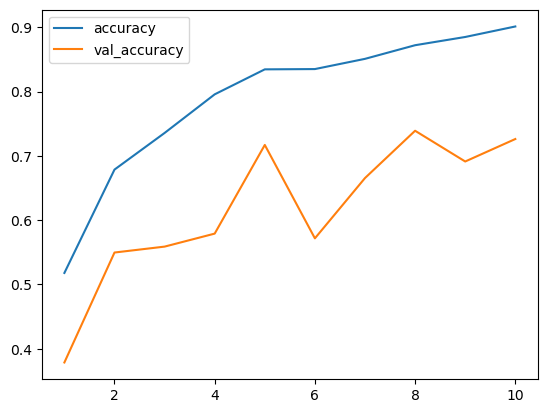

In [32]:
#Measure training data:
history_df = pd.DataFrame(history.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1
# Plot the accuracy
history_df.plot(y=["accuracy", "val_accuracy"])
plt.savefig(f'Graphs/AccuracyOB{model_number}.png')
plt.show()

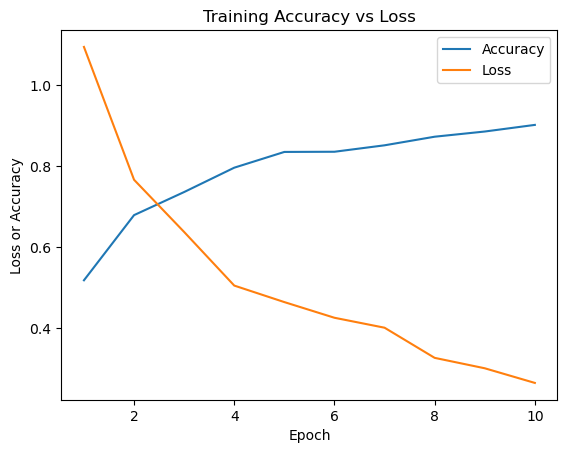

In [30]:
# Get training and test loss histories
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_accuracy, label='')
plt.plot(epoch_count, training_loss, label='Loss')
plt.legend(['Accuracy', 'Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss or Accuracy')
plt.title('Training Accuracy vs Loss')
plt.savefig(f'Graphs/TrainingLA{model_number}.png')
plt.show()

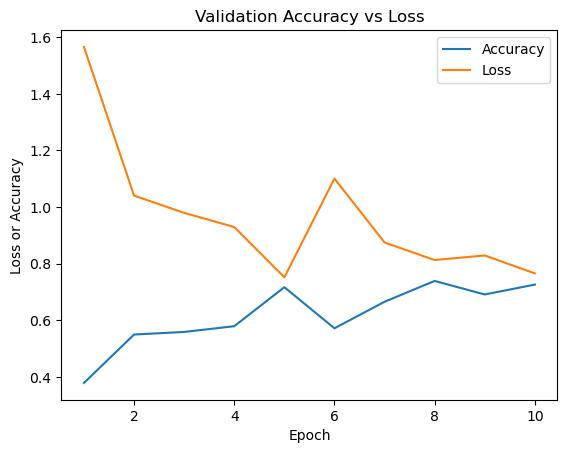

In [29]:
#Visualize Validation  History
plt.plot(epoch_count, val_accuracy, label='Accuracy')
plt.plot(epoch_count, val_loss, label='Loss')
plt.legend(['Accuracy', 'Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss or Accuracy')
plt.title('Validation Accuracy vs Loss')
plt.savefig(f'Graphs/ValidationLA{model_number}.png')
plt.show()

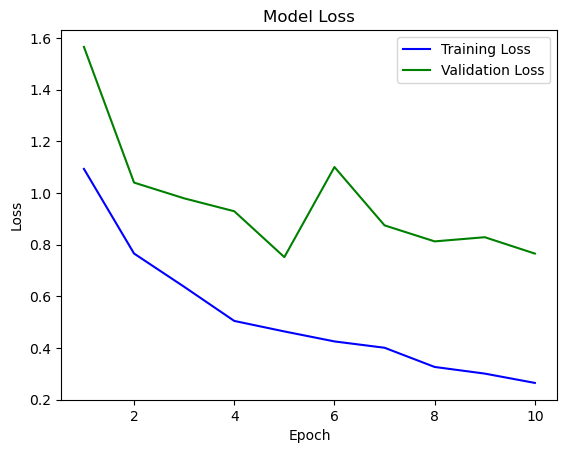

In [28]:
# Visualize loss history
plt.plot(epoch_count, training_loss, 'b-', label='Training')
plt.plot(epoch_count, val_loss, 'g-', label='Validation')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.savefig(f'Graphs/Loss{model_number}.png')
plt.show()

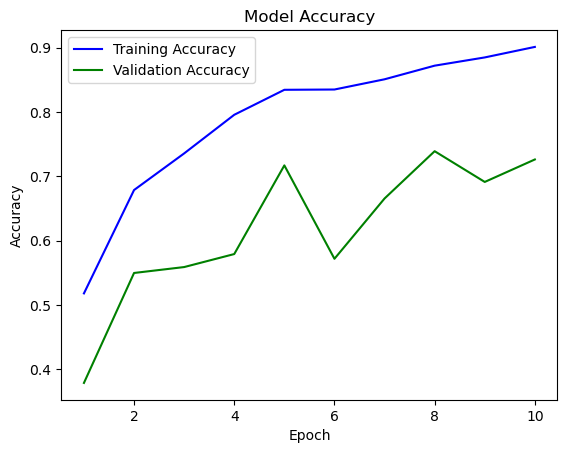

In [25]:
# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'b-', label='Training')
plt.plot(epoch_count, val_accuracy, 'g-', label='Validation')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.savefig(f'Graphs/Accuracy{model_number}.png')
plt.show()

In [45]:
# #Test Accuracy/Loss
# test_loss1 = history.history['test_loss']
# test_acc1 = history.history['test_acc']

# plt.plot(1, test_acc1, 'b-', label='loss')
# plt.plot(1, test_loss1, 'g-', label='accuracy')
# plt.legend(['Testing Loss', 'Testing Accuracy'])
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy / Loss')
# plt.title('Testing Model Accuracy vs Loss')
# plt.savefig(f'Graphs/TestAL{model_number}.png')
# plt.show()

# Actual test

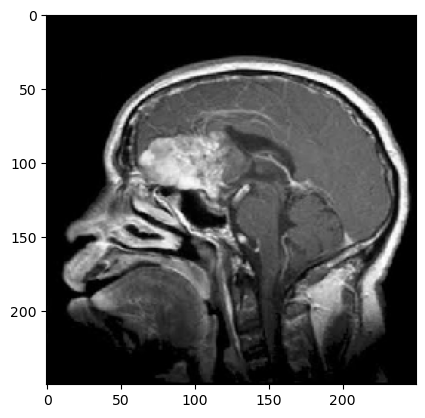

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to your specific image
image_path = '../Testing/glioma_tumor/image(10).jpg'

# Load the image and resize it to match the input shape of your model
img = image.load_img(image_path, target_size=(image_width, image_height))

# Display the loaded image
plt.imshow(img)
plt.axis('on')  # Remove axes for clarity
plt.show()

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Rescale the image
img_array /= 255.

# extra dimension for the batch size
# img_array = np.expand_dims(img_array, axis=0)
img_array

In [15]:
# # Create an ImageDataGenerator for training with data augmentation
# test_image = ImageDataGenerator(
#     rescale=1./255,  # Normalize pixel values
#     shear_range=0.2,  # Shear angle in counter-clockwise direction
#     zoom_range=0.2,   # Range for random zoom
#     horizontal_flip=True,  # Randomly flip inputs horizontally
#     validation_split=0.2)  # Here we specify the validation split

# # Flow training images in batches using train_datagen generator
# test_image_rescaled = test_image.flow_from_directory(
#         '../Training/',
#         target_size=(image_width, image_height),
#         batch_size=32,
#         color_mode="grayscale",
#         class_mode='categorical',
#         subset='training',
#         shuffle=True,
#         seed=42)  # Set as training data

In [16]:
predictions = model.predict(img_array)

# Print
print(predictions)

ValueError: in user code:

    File "c:\Users\insul\anaconda3\envs\dev\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\insul\anaconda3\envs\dev\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\insul\anaconda3\envs\dev\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\insul\anaconda3\envs\dev\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "c:\Users\insul\anaconda3\envs\dev\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\insul\anaconda3\envs\dev\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 250, 250, 3), found shape=(None, 250, 3)


In [ ]:
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted class: {predicted_class}")

Predicted class: [1]


In [ ]:
class_names = ['glioma', 'meningioma', 'no', 'pituitary'] 
print(f"Predicted class name: {class_names[predicted_class[0]]}")

Predicted class name: meningioma
